<font color= #885a97 face="times, serif" size=6.5>Visualising high-dimensional datasets using PCA and t-SNE in Python</font>

### From: Luuk Derksen

https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b

### there are many resources you can check...
https://github.com/oreillymedia/t-SNE-tutorial

<font color=  #6d3b0c  face="times, serif" size=5>The **MNIST** database of handwritten digits, available from this page, has a training set of 60,000 examples, and a test set of 10,000 examples. It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. 

In [2]:
import numpy as np
from sklearn.datasets import fetch_mldata


mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target

print(X.shape, y.shape)

(70000, 784) (70000,)


In [3]:
import pandas as pd


feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]

df = pd.DataFrame(X,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))

X, y = None, None


print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


<font color=  #c5273a  face="times, serif" size=5>============================================<br>
**TO DO:** how many examples for each digit?</font>

In [9]:
df['label'].describe()

count     70000
unique       10
top         1.0
freq       7877
Name: label, dtype: object

In [24]:
df.groupby(['label']).agg({'label': 'count'}).transpose()

label,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
label,6903,7877,6990,7141,6824,6313,6876,7293,6825,6958


** Because we dont want to be using 70,000 digits in some calculations we’ll take a random subset of the digits. The randomisation is important as the dataset is sorted by its label (i.e., the first seven thousand or so are zeros, etc.). To ensure randomisation we’ll create a random permutation of the number 0 to 69,999 which allows us later to select the first five or ten thousand for our calculations and visualisations.**

In [25]:
rndperm = np.random.permutation(df.shape[0])

<font color= #792c35 face="times, bold" size=5>The images are all essentially 28-by-28 pixel images and therefore have a total of 784 ‘dimensions’, each holding the value of one specific pixel

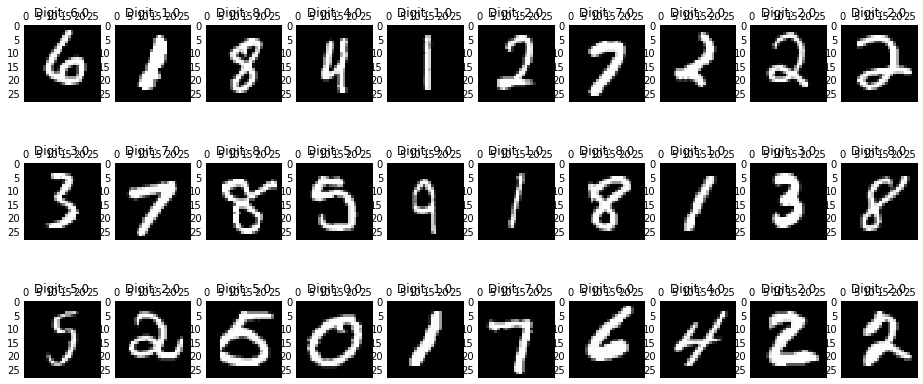

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt


# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))

plt.show()

<font color=   #FF5733   face="times, serif" size=6>============================<br>Dimensionality reduction using PCA from **sklearn**

<font color=  #c5273a  face="times, serif" size=5>============================================<br>
**TO DO:** Fit PCA to df[feat_cols]</font>

In [39]:
from sklearn.decomposition import PCA


pca = PCA(n_components=3)
pca_result = pca.fit_transform(df[feat_cols])

<font color=  #c5273a  face="times, serif" size=5>============================================<br>
**TO DO:** ADD tree columns to df with pca-one -two and -three scores & Print variance explained</font>

In [40]:
df['pca-one'] = pca_result[:,0]
df['pca-two'] = pca_result[:,1] 
df['pca-three'] = pca_result[:,2]


print('Explained variation per principal component: {}'.format(pca.explained_variance_ratio_))

Explained variation per principal component: [ 0.09746116  0.07155445  0.06149531]


<font color= #792c35 face="times, bold" size=5>Now, given that **the first two components account for about 25% (??)** of the variation in the entire dataset lets see if that is enough to visually set the different digits apart. What we can do is create a scatterplot of the first and second principal component and color each of the different types of digits with a different color. If we are lucky the same type of digits will be positioned (i.e., clustered) together in groups, which would mean that the first two principal components actually tell us a great deal about the specific types of digits.

In [42]:
! pip install ggplot

    100% |████████████████████████████████| 2.2MB 464kB/s 


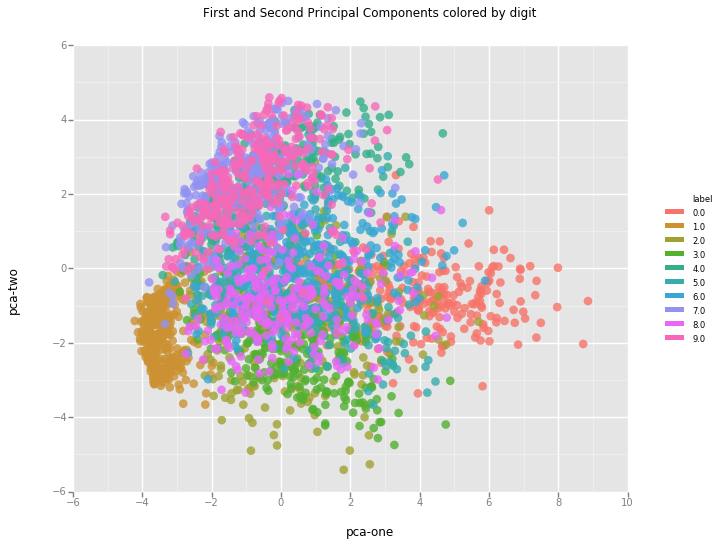

<ggplot: (8772404863240)>

In [43]:
from ggplot import *


chart = ggplot( df.loc[rndperm[:3000],:], aes(x='pca-one', y='pca-two', color='label') ) \
        + geom_point(size=75,alpha=0.8) \
        + ggtitle("First and Second Principal Components colored by digit")
chart

<font color=   #FF5733   face="times, serif" size=6>=========================================<br>Dimensionality reduction using<br> **t-Distributed Stochastic Neighbouring Entities (t-SNE)**

<font color= #792c35 face="times, bold" size=5>t-Distributed stochastic neighbor embedding (t-SNE) minimizes the divergence between two distributions: a distribution that measures pairwise similarities of the input objects and a distribution that measures pairwise similarities of the corresponding low-dimensional points in the embedding.

<font color= #eb0a3a size=5>**LIMITATIONS:**<br>
* It is highly recommended to use another dimensionality reduction method (e.g. PCA for dense data or TruncatedSVD for sparse data)to reduce the number of dimensions to a reasonable amount (e.g. 50) if the number of features is very high.<br><br>
* Since t-SNE scales quadratically in the number of objects N, its applicability is limited to data sets with **only a few thousand input objects**; beyond that, learning becomes too slow to be practical (and the memory requirements become too large)

<font color= blue size=4>**To make sure we don’t burden our machine in terms of memory and power/time we will only use the first 7,000 samples to run the algorithm on.**

In [45]:
import time

from sklearn.manifold import TSNE

n_sne = 7000

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(df.loc[rndperm[:n_sne],feat_cols])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7000 samples in 0.949s...
[t-SNE] Computed neighbors for 7000 samples in 66.162s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7000
[t-SNE] Computed conditional probabilities for sample 2000 / 7000
[t-SNE] Computed conditional probabilities for sample 3000 / 7000
[t-SNE] Computed conditional probabilities for sample 4000 / 7000
[t-SNE] Computed conditional probabilities for sample 5000 / 7000
[t-SNE] Computed conditional probabilities for sample 6000 / 7000
[t-SNE] Computed conditional probabilities for sample 7000 / 7000
[t-SNE] Mean sigma: 2.201835
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.663986
[t-SNE] Error after 300 iterations: 2.443471
t-SNE done! Time elapsed: 157.5798044204712 seconds


## t-SNE is a tuneable parameter:

<font color= #792c35 face="times, bold" size=5>**“perplexity”** <br>
<font size=4.5>which says (loosely) how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities.

<font color= #eb0a3a size=5>How to Use t-SNE Effectively:</font>

### Although extremely useful for visualizing high-dimensional data, t-SNE plots can sometimes be mysterious or misleading. By exploring how it behaves in simple cases, we can learn to use it more effectively.
See https://distill.pub/2016/misread-tsne/

<font color= #792c35 face="times, bold" size=5>... creating a scatter plot of the two dimensions and coloring each sample by its respective label

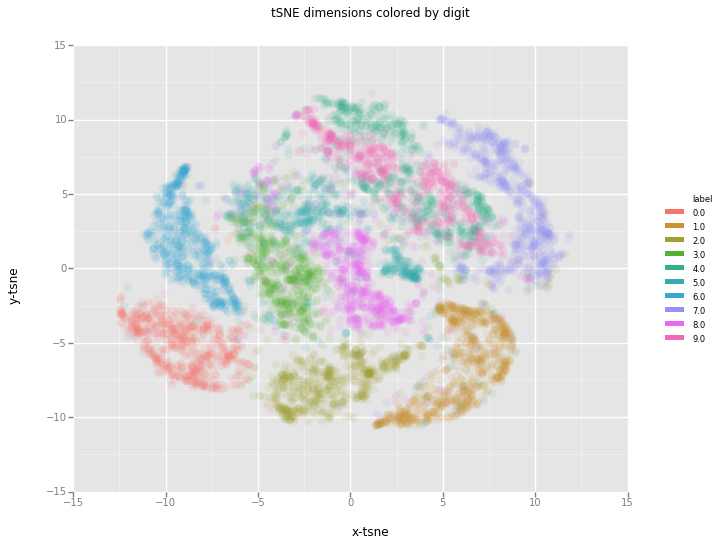

<ggplot: (8772404251540)>

In [46]:
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne'] = tsne_results[:,0]
df_tsne['y-tsne'] = tsne_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne', y='y-tsne', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by digit")
chart

<font color= #eb0a3a size=5>If we would now use a **clustering algorithm** to pick out the seperate clusters we could probably quite accurately assign new points to a label.

<font color=  #c5273a  face="times, serif" size=5>============================================<br>
**TO DO: Now take the recommendations and reduce the number of dimensions before feeding the data into the t-SNE algorithm. For this we’ll use PCA again:<br><br>

* We will first create a new dataset containing the fifty dimensions generated by the PCA reduction algorithm. We can then use this dataset to perform the t-SNE on
</font>

In [47]:
pca_50 = PCA(n_components=50)
pca_result_50 = pca_50.fit_transform(df[feat_cols].values)


print('Explained variation per principal component (PCA): {}'\
      .format(np.sum(pca_50.explained_variance_ratio_)))


Explained variation per principal component (PCA): 0.8254053812369454


### Now lets try and feed this data into the t-SNE algorithm. This time we’ll use 10,000 samples out of the 70,000 to make sure the algorithm does not take up too much memory and CPU. 

In [49]:
n_sne = 10000

time_start = time.time()

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_pca_results = tsne.fit_transform(pca_result_50[rndperm[:n_sne]])


print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.027s...
[t-SNE] Computed neighbors for 10000 samples in 11.176s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.822912
[t-SNE] KL divergence after 250 iterations with early exaggeration: 84.973457
[t-SNE] Error after 300 iterations: 2.776882
t-SNE done! Time elapsed: 134.39

<font color=  #c5273a  face="times, serif" size=5>Visualization

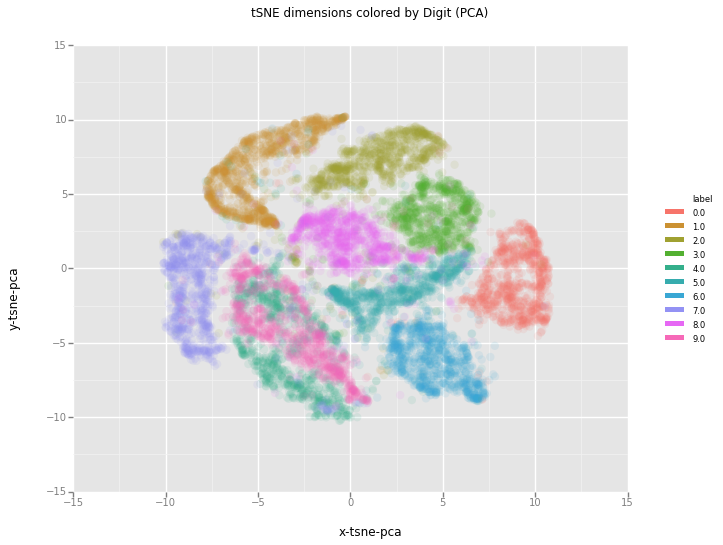

<ggplot: (-9223363264453318200)>

In [50]:
df_tsne = None
df_tsne = df.loc[rndperm[:n_sne],:].copy()
df_tsne['x-tsne-pca'] = tsne_pca_results[:,0]
df_tsne['y-tsne-pca'] = tsne_pca_results[:,1]

chart = ggplot( df_tsne, aes(x='x-tsne-pca', y='y-tsne-pca', color='label') ) \
        + geom_point(size=70,alpha=0.1) \
        + ggtitle("tSNE dimensions colored by Digit (PCA)")
chart